### Task 1: Constructing and dividing triangulated meshes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image

To generate a triangulated surface, we can start by defining a list of vertices and a list of triangles.

For example, let's say we want to create a triangular surface with three vertices at the points (0,0,0), (1,0,0), and (0,1,0). We can define the list of vertices as follows:

In [6]:
vertices = [(0,0,0), (1,0,0), (0,1,0)]
vertices


[(0, 0, 0), (1, 0, 0), (0, 1, 0)]

In [10]:
list(zip(*vertices))

[(0, 1, 0), (0, 0, 1), (0, 0, 0)]

Next, we can define the list of triangles by specifying the indices of the vertices that make up each triangle. In this case, we only have one triangle with vertices at indices 0, 1, and 2.

In [7]:
triangles = [(0,1,2)]


We can then use these lists to create a triangulated surface. For example, we could use a library like matplotlib to visualize the surface:

TypeError: tuple indices must be integers or slices, not tuple

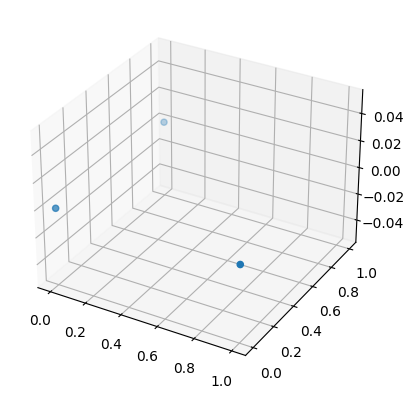

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vertices
x, y, z = zip(*vertices)
ax.scatter(x, y, z)

# Plot the triangles
for triangle in triangles:
    ax.plot(x[triangle], y[triangle], z[triangle])

plt.show()


In [ ]:
def surface_dividing(vertices, triangles, sagittal_plane):
    # Create empty lists for the vertices and triangles of the two resulting surfaces
    surface1_vertices = []
    surface2_vertices = []
    surface1_triangles = []
    surface2_triangles = []

    # Iterate through the triangles
    for triangle in triangles:
        # Initialize variables to track which vertices are on which side of the sagittal plane
        surface1_count = 0
        surface2_count = 0

        # Iterate through the vertices of the current triangle
        for vertex in triangle:
            # Check if the vertex is on the left or right side of the sagittal plane
            if vertices[vertex][0] < sagittal_plane:
                surface1_count += 1
            else:
                surface2_count += 1

        # If all vertices are on the same side of the sagittal plane, add the triangle to the corresponding list
        if surface1_count == 3:
            surface1_triangles.append(triangle)
        elif surface2_count == 3:
            surface2_triangles.append(triangle)
        # If the vertices are on both sides of the sagittal plane, we need to split the triangle
        else:
            # Create a list of the indices of the vertices on each side of the sagittal plane
            surface1_indices = []
            surface2_indices = []
            for i, vertex in enumerate(triangle):
                if vertices[vertex][0] < sagittal_plane:
                    surface1_indices.append(i)
                else:
                    surface2_indices.append(i)

            # Split the triangle into two new triangles
            triangle1 = [triangle[surface1_indices[0]], triangle[surface2_indices[0]], triangle[surface2_indices[1]]]
            triangle2 = [triangle[surface1_indices[1]], triangle[surface2_indices[0]], triangle[surface2_indices[1]]]

            # Add the new triangles to the corresponding lists
            surface1_triangles.append(triangle1)
            surface2_triangles.append(triangle2)

    # Create the lists of vertices for the two resulting surfaces by adding any new vertices created when splitting triangles
    for triangle in surface1_triangles:
        for vertex in triangle:
            if vertex not in surface1_vertices:
                surface1_vertices.append(vertex)
    for triangle in surface2_triangles:
        for vertex in triangle:
            if vertex not in surface2_vertices:
                surface2_vertices.append(vertex)

    return surface1_vertices, surface1_triangles, surface2_vertices, surface2_triangles


In [3]:
3%3

0

In [ ]:
def sagittal_plane(vertices, triangles, sagittal):
    vertices_sagittal = []
    triangles_sagittal = []

    for vertex in vertices:
        if vertex[0] == sagittal:
            vertices_sagittal.append(vertex)

    for triangle in triangles:
        if triangle[0][0] == sagittal or triangle[1][0] == sagittal or triangle[2][0] == sagittal:
            triangles_sagittal.append(triangle)

    return vertices_sagittal, triangles_sagittal

In [ ]:
# Copilot
def surface_dividing(vertices, triangles, sagittal_plane):
    # Create empty lists for the vertices and triangles of the two resulting surfaces
    surface1_vertices = []
    surface2_vertices = []
    surface1_triangles = []
    surface2_triangles = []

    # Iterate through the triangles
    for triangle in triangles:
        # Initialize variables to track which vertices are on which side of the sagittal plane
        surface1_count = 0
        surface2_count = 0

        # Iterate through the vertices of the current triangle
        for vertex in triangle:
            # Check if the vertex is on the left or right side of the sagittal plane
            if vertices[vertex][0] < sagittal_plane:
                surface1_count += 1
            else:
                surface2_count += 1

        # If all vertices are on the same side of the sagittal plane, add the triangle to the corresponding list
        if surface1_count == 3:
            surface1_triangles.append(triangle)
        elif surface2_count == 3:
            surface2_triangles.append(triangle)
        # If the vertices are on both sides of the sagittal plane, we need to split the triangle
        else:
            # Create a list of the indices of the vertices on each side of the sagittal plane
            surface1_indices = []
            surface2_indices = []
            for i, vertex in enumerate(triangle):
                if vertices[vertex][0] < sagittal_plane:
                    surface1_indices.append(i)
                else:
                    surface2_indices.append(i)

            # Split the triangle into two new triangles
            triangle1 = [triangle[surface1_indices[0]], triangle[surface2_indices[0]], triangle[surface2_indices[1]]]
            triangle2 = [triangle[surface1_indices[1]], triangle[surface2_indices[0]], triangle[surface2_indices[1]]]

            # Add the new triangles to the corresponding lists
            surface1_triangles.append(triangle1)
            surface2_triangles.append(triangle2)

    # Create the lists of vertices for the two resulting surfaces by adding any new vertices created when splitting triangles
    for triangle in surface1_triangles:
        for vertex in triangle:
            if vertex not in surface1_vertices:
                surface1_vertices.append(vertex)
    for triangle in surface2_triangles:
        for vertex in triangle:
            if vertex not in surface2_vertices:
                surface

In [ ]:
# Chat Gpt2
def surface_dividing(vertices, triangles, sagittal_plane):
    left_vertices = []
    right_vertices = []
    left_triangles = []
    right_triangles = []

    # Split the vertices into left and right based on the sagittal plane
    for vertex in vertices:
        if vertex[0] < sagittal_plane:
            left_vertices.append(vertex)
        else:
            right_vertices.append(vertex)

    # Split the triangles into left and right by checking which side of the
    # sagittal plane each vertex lies
    for triangle in triangles:
        triangle_vertices = [vertices[triangle[0]], vertices[triangle[1]], vertices[triangle[2]]]
        left_count = 0
        right_count = 0
        for vertex in triangle_vertices:
            if vertex[0] < sagittal_plane:
                left_count += 1
            else:
                right_count += 1
        
        # If the triangle is fully on one side of the sagittal plane, add it to
        # the appropriate list of triangles
        if left_count == 3:
            left_triangles.append(triangle)
        elif right_count == 3:
            right_triangles.append(triangle)
        else:
            # The triangle straddles the sagittal plane, so we need to split it
            # into two triangles

            # Find the indices of the vertices in the left and right lists
            left_indices = []
            right_indices = []
            for i, vertex in enumerate(triangle_vertices):
                if vertex[0] < sagittal_plane:
                    left_indices.append(i)
                else:
                    right_indices.append(i)
            
            # Create the two new triangles by combining the vertices on opposite
            # sides of the sagittal plane
            left_triangles.append((triangle[left_indices[0]], triangle[left_indices[1]], triangle[right_indices[0]]))
            right_triangles.append((triangle[right_indices[0]], triangle[right_indices[1]], triangle[left_indices[0]]))

    return left_vertices, left_triangles, right_vertices, right_triangles


In [1]:
# Eric
vertices = [(0, 0, 0), (1, 0, 0), (2, 0, 0), (0, 1, 0), (1, 1, 0), (2, 1, 0), (0, 0, 1), (1, 0, 1), (2, 0, 1)]
triangles = [(0, 3, 4)]#, (4, 1, 0), (1, 4, 5), (5, 2, 1), (3, 6, 7), (7, 4, 3), (4, 7, 8), (8, 5, 4), (2, 5, 8), (8, 7, 2), (0, 1, 2), (2, 3, 0)]
sagittal_plane = 1.5

# Constructing and dividing triangulated meshes
def surface_divivding(vertices, triangles, saggital_plane):
    # The vertices and triangles for the left and right surfaces that are split by the sagittal plane.
    left_vertices = []
    right_vertices = []
    left_triangles = []
    right_triangles = []

    # Split the vertices into left or right based on the saggital plane (saggital plane is oriented along the x-axis)
    for vertex in vertices:
        if vertex[0] < saggital_plane:
            left_vertices.append(vertex)
        else:
            right_vertices.append(vertex)
    
    # Split the triangles into left or right by checking which side of the saggital plane each vertex lies
    for triangle in triangles:
        triangle_vertices = [vertices[triangle[0]], vertices[triangle[1]], vertices[triangle[2]]]
        left_count = 0
        right_count = 0
        for vertex in triangle_vertices:
            if vertex[0] < saggital_plane:
                left_count += 1
            else:
                right_count += 1
            
        # If the triangle is fully on one side of the saggital plane, add it to the appropriate list of triangles
        if left_count == 3:
            left_triangles.append(triangle)
        elif right_count == 3:
            right_triangles.append(triangle)
        else:
        # When a plane is intersected by a triangle, the triangle is split into two triangles
        # Find the indices of the vertices in the left and right lists
            left_indices = []
            right_indices = []

            for i, vertex in enumerate(triangle_vertices):
                left_indices.append(i)
            else:
                right_indices.append(i)
            # Create the two new triangles by combining the vertices on opposite sides of the saggital plane
            left_triangles.append((triangle[left_indices[0]], triangle[left_indices[1]], triangle[right_indices[0]]))
            right_triangles.append((triangle[right_indices[0]], triangle[right_indices[1]], triangle[left_indices[0]]))

    return left_vertices, left_triangles, right_vertices, right_triangles
            
            
    
    
    

    

In [1]:
vertices = [(0, 0, 0), (1, 0, 0), (2, 0, 0), (0, 1, 0), (1, 1, 0), (2, 1, 0), (0, 0, 1), (1, 0, 1), (2, 0, 1)]
triangles = [(0, 3, 4), (4, 1, 0), (1, 4, 5), (5, 2, 1), (3, 6, 7), (7, 4, 3), (4, 7, 8), (8, 5, 4), (2, 5, 8), (8, 7, 2), (0, 1, 2), (2, 3, 0)]
vertices[triangles[0][2]]

(1, 1, 0)

In [9]:
# # Eric
# Constructing and dividing triangulated meshes
def surface_dividing(triangulated_surface, sagittal_plane):
    """
    Function that takes a triangulated surface (represented by a list of vertices and a list of triangles) and
    a sagittal plane (scalar value), andreturns two lists representing two triangulated surfaces separated by the sagittal plane.
    The triangles are represented by a list of indices of the vertices that make up each triangle.
    In the case the plane intersects a triangle, new triangles are formed.

    Example of usage:
    # Define function inputs
    vertices = [(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)]
    triangles = [(0, 3, 4), (0, 1, 2)]
    sagittal_plane = 1.5
    triangulated_surface = [[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)], [(0, 3, 4), (0, 1, 2)]]

    # Call function
    triangulated_surfaces_left, triangulated_surfaces_right = surface_dividing(triangulated_surface, sagittal_plane) 
    """
    vertices = triangulated_surface[0]
    triangles = triangulated_surface[1]
    
    # Create empty lists of vertices and triangles for the left and right surfaces that are split by the sagittal plane
    left_vertices = []
    right_vertices = []
    left_triangles = []
    right_triangles = []

    # Split the vertices into left or right based on the sagittal plane (sagittal plane is oriented along the x-axis)
    for vertex in vertices:
        if vertex[0] < sagittal_plane:
            left_vertices.append(vertex)
        else:
            right_vertices.append(vertex)
    
    # Split the triangles into left or right by checking which side of the sagittal plane each vertex lies
    for triangle in triangles:
        triangle_vertices = [vertices[triangle[0]], vertices[triangle[1]], vertices[triangle[2]]]
        left_count = 0
        right_count = 0
        for vertex in triangle_vertices:
            if vertex[0] < sagittal_plane:
                left_count += 1
            else:
                right_count += 1
            
        # If the triangle is fully on one side of the sagittal plane, add it to the appropriate list of triangles
        if left_count == 3:
            left_indices = []
            for i in range(3):
                left_indices.append(left_vertices.index(triangle_vertices[i]))
            left_triangles.append(tuple(left_indices))
        elif right_count == 3:
            right_indices = []
            for i in range(3):
                right_indices.append(right_vertices.index(triangle_vertices[i]))
            right_triangles.append(tuple(right_indices))
        else:
        # When a plane is intersected by a triangle, the triangle is split into two triangles
        # Find the indices of the vertices in the left and right lists
            left_indices = []
            right_indices = []

            intersection_points = []
            for i in range(len(triangle_vertices)):
                v1 = triangle_vertices[i]
                v2 = triangle_vertices[(i+1) % 3]
                if v1[0] < sagittal_plane < v2[0] or v2[0] < sagittal_plane < v1[0]:
                    t = (sagittal_plane - v1[0]) / (v2[0] - v1[0])
                    intersection_point = (sagittal_plane, v1[1] + t * (v2[1] - v1[1]), v1[2] + t * (v2[2] - v1[2]))
                    if intersection_point != v1 and intersection_point != v2:
                        intersection_points.append(intersection_point)

            # Add the intersection points to the left and right vertices lists
            for i in range(len(intersection_points)):
                if intersection_points[i] not in left_vertices:
                    left_vertices.append(tuple(intersection_points[i]))
                if intersection_points[i] not in right_vertices:
                    right_vertices.append(tuple(intersection_points[i]))
                
            # right_vertices.append(tuple(intersection_points[0]))
            # left_vertices.append(tuple(intersection_points[1]))
            # right_vertices.append(tuple(intersection_points[1]))

            




            for vertex in triangle_vertices:
                if vertex[0] < sagittal_plane:
                    left_indices.append(left_vertices.index(vertex))
                else:
                    right_indices.append(right_vertices.index(vertex))

            # Create the two new triangles by combining the vertices on opposite sides of the sagittal plane
            if right_count == 1:
                right_triangles.append((right_indices[0], right_vertices.index((intersection_points[0])), right_vertices.index((intersection_points[1]))))
            else:
                right_triangles.append((right_indices[0], right_vertices.index((intersection_points[0])), right_vertices.index((intersection_points[1]))))
                right_triangles.append((right_indices[1], right_vertices.index((intersection_points[0])), right_vertices.index((intersection_points[1]))))
                right_triangles.append((right_indices[0], right_indices[1] , right_vertices.index((intersection_points[0]))))
                right_triangles.append((right_indices[0], right_indices[1] , right_vertices.index((intersection_points[1]))))
                
            
            # Create the two new triangles by combining the vertices on opposite sides of the sagittal plane
            if left_count == 1:
                left_triangles.append((left_indices[0], left_vertices.index((intersection_points[0])), left_vertices.index((intersection_points[1]))))
            else:
                left_triangles.append((left_indices[0], left_vertices.index((intersection_points[0])), left_vertices.index((intersection_points[1]))))
                left_triangles.append((left_indices[1], left_vertices.index((intersection_points[0])), left_vertices.index((intersection_points[1]))))
                left_triangles.append((left_indices[0], left_indices[1] , left_vertices.index((intersection_points[0]))))
                left_triangles.append((left_indices[0], left_indices[1] , left_vertices.index((intersection_points[1]))))
                

    return [left_vertices, left_triangles], [right_vertices, right_triangles]
            
            
vertices = [(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)]#, (0, 0, 1), (1, 0, 1), (2, 0, 1)]
triangles = [(0, 3, 4), (0, 1, 2)]#, (4, 1, 0), (1, 4, 5), (5, 2, 1), (3, 6, 7), (7, 4, 3), (4, 7, 8), (8, 5, 4), (2, 5, 8), (8, 7, 2), (0, 1, 2), (2, 3, 0)]
sagittal_plane = 1.5
triangulated_surface = [[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)], [(0, 3, 4), (0, 1, 2)]]
surface_dividing(triangulated_surface, sagittal_plane) 

    

([[(0, 0, 0),
   (1, 1, 0),
   (0, 1, 0),
   (1.5, 1.0, 0.0),
   (1.5, 0.75, 0.0),
   (1.5, 0.5, 0.0),
   (1.5, 0.0, 0.0)],
  [(0, 3, 4),
   (2, 3, 4),
   (0, 2, 3),
   (0, 2, 4),
   (0, 5, 6),
   (1, 5, 6),
   (0, 1, 5),
   (0, 1, 6)]],
 [[(2, 0, 0),
   (2, 1, 0),
   (1.5, 1.0, 0.0),
   (1.5, 0.75, 0.0),
   (1.5, 0.5, 0.0),
   (1.5, 0.0, 0.0)],
  [(1, 2, 3), (0, 4, 5)]])

In [5]:
vtr=[[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)], [(0, 3, 4), (0, 1, 2)]]
vtr

[[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)],
 [(0, 3, 4), (0, 1, 2)]]

In [7]:
vtr[0]

[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)]

In [8]:
vtr[1]

[(0, 3, 4), (0, 1, 2)]

In [2]:
vertices.index((1, 1, 0))

4

Bad pipe message: %s [b"\x98\xd7\xd2\x08\\\xf3\xb4O=\x02\x1aG\xbb\xe4~\xf1!\xbb\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04"]
Bad pipe message: %s [b'\x01\x02']
Bad pipe message: %s [b'/\xc9\xcf\xb8gG\x80J\xe6\xf0B\xab!|\x041\xb7T\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc0\t\x003\x002\x001\x000\x00\x9a\x00\x99\x00\x98\x00\x97\x00E\x00D\x00C\x00B\xc0\x18\x004\x00\x9b\x00F\xc0\x0e\xc0\x04\x00/\x00\x96\x00A\x00\x07\xc0\x11\xc0\x07\xc0\x16\x00\x18\xc0\x0c\xc0\x02

In [2]:
for i, vertex in enumerate(vertices):
    print(i, vertex)
    print()

0 (0, 0, 0)

1 (1, 0, 0)

2 (2, 0, 0)

3 (0, 1, 0)

4 (1, 1, 0)

5 (2, 1, 0)

6 (0, 0, 1)

7 (1, 0, 1)

8 (2, 0, 1)



In [ ]:
vertices = [(0, 0, 0), (1, 0, 0), (2, 0, 0), (0, 1, 0), (1, 1, 0), (2, 1, 0), (0, 0, 1), (1, 0, 1), (2, 0, 1)]
triangles = [(0, 3, 4), (4, 1, 0), (1, 4, 5), (5, 2, 1), (3, 6, 7), (7, 4, 3), (4, 7, 8), (8, 5, 4), (2, 5, 8), (8, 7, 2), (0, 1, 2), (2, 3, 0)]
sagittal_plane = 1.5

left_vertices, left_triangles, right_vertices, right_triangles = surface_dividing(vertices, triangles, sagittal_plane)

print("Left vertices:", left_vertices)
print("Left triangles:", left_triangles)
print("Right vertices:", right_vertices)
print("Right triangles:", right_triangles)

# Left vertices: [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (0, 0, 1), (1, 0, 1)]
# Left triangles: [(0, 3, 4), (4, 1, 0), (1, 4, 5), (5, 0, 1), (3, 6, 7), (7, 4, 3), (4, 7, 8), (8, 5, 4), (0, 1, 2), (2, 3, 0)]
# Right vertices: [(2, 0, 0), (2, 1, 0), (2, 0, 1)]
# Right triangles: [(1, 4, 5), (5, 2, 1), (4, 7, 8), (8, 5, 4), (2, 5, 8), (8, 7, 2)]


This shows that the function has correctly split the surface into left and right halves based on the sagittal plane at position 1.5. The left surface contains the vertices and triangles on the left side of the sagittal plane, and the right surface contains the vertices and triangles on the right side of the sagittal plane.

This function takes in a list of vertices and a list of triangles, both represented as lists of tuples, and a scalar value representing the position of the sagittal plane. It returns four lists: the vertices and triangles for the left and right surfaces that are split by the sagittal plane.

The function first splits the vertices into left and right based on the position of the sagittal plane. It then iterates through the triangles and checks which side of the sagittal plane each vertex lies. If the triangle is fully on one side of the sagittal plane, it adds it to the appropriate list of triangles. If the triangle straddles the sagittal plane, it splits the triangle into two triangles by combining the vertices on opposite sides of the sagittal plane.

In [1]:
# # Eric
# Constructing and dividing triangulated meshes
def surface_dividing(triangulated_surface, sagittal_plane):
    """
    Function that takes a triangulated surface (represented by a list of vertices and a list of triangles) and
    a sagittal plane (scalar value), andreturns two lists representing two triangulated surfaces separated by the sagittal plane.
    The triangles are represented by a list of indices of the vertices that make up each triangle.
    In the case the plane intersects a triangle, new triangles are formed.

    Example of usage:
    # Define function inputs
    vertices = [(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)]
    triangles = [(0, 3, 4), (0, 1, 2)]
    sagittal_plane = 1.5
    triangulated_surface = [[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)], [(0, 3, 4), (0, 1, 2)]]

    # Call function
    triangulated_surfaces_left, triangulated_surfaces_right = surface_dividing(triangulated_surface, sagittal_plane) 
    """
    vertices = triangulated_surface[0]
    triangles = triangulated_surface[1]
    
    # Create empty lists of vertices and triangles for the left and right surfaces that are split by the sagittal plane
    left_surface_vertices = []
    right_surface_vertices = []
    left_surface_triangles = []
    right_surface_triangles = []

    # Split the vertices into left or right based on their relative position wrt sagittal plane
    # sagittal plane is oriented along the x-axis hence x component of vertices is used for comparison
    for vertex in vertices:
        if vertex[0] < sagittal_plane:
            left_surface_vertices.append(vertex)
        else:
            right_surface_vertices.append(vertex)
    
    # Determine the position of triangles by checking which side of the sagittal plane each vertex lies
    for triangle in triangles:
        # Extract the respective vertices of the triangle
        triangle_vertices = [vertices[triangle[0]], vertices[triangle[1]], vertices[triangle[2]]]

        # Add counters for determining the position of vertices
        left_of_sagittal = 0
        right_of_sagittal = 0
        for vertex in triangle_vertices:
            if vertex[0] < sagittal_plane:
                left_of_sagittal += 1
            else:
                right_of_sagittal += 1
            
        # If the triangle is fully on one side of the sagittal plane, add it to the appropriate list of triangles
        if left_of_sagittal == 3:
            # Index of the vertices that make up the triangle
            left_indices = []
            for i in range(len(triangle_vertices)):
                left_indices.append(left_surface_vertices.index(triangle_vertices[i]))
            left_surface_triangles.append(tuple(left_indices))

        elif right_of_sagittal == 3:
            right_indices = []
            for i in range(len(triangle_vertices)):
                right_indices.append(right_surface_vertices.index(triangle_vertices[i]))
            right_surface_triangles.append(tuple(right_indices))

        else:
        # When a plane is intersected by a triangle, the triangle is split into two triangles
        # Find the indices of the vertices in the left and right lists
            left_indices = []
            right_indices = []
        # Empty array to store intersection points
            intersection_points = []

        # Determine the point of intersection between a triangles edges and the sagittal plane
            for i in range(len(triangle_vertices)):
                v1 = triangle_vertices[i]
                v2 = triangle_vertices[(i+1) % 3]
            # Check whether the saggital plane intersects with a triangle's edge
                if v1[0] < sagittal_plane < v2[0] or v2[0] < sagittal_plane < v1[0]:
                    edge_ip = (sagittal_plane - v1[0]) / (v2[0] - v1[0])
                    intersection_point = (sagittal_plane, v1[1] + edge_ip * (v2[1] - v1[1]), v1[2] + edge_ip * (v2[2] - v1[2]))
                    if intersection_point != v1 and intersection_point != v2:
                        intersection_points.append(intersection_point)

            # Add the intersection points to the left and right vertices lists and ensure they do not exist yet
            for i in range(len(intersection_points)):
                if intersection_points[i] not in left_surface_vertices:
                    left_surface_vertices.append(tuple(intersection_points[i]))
                if intersection_points[i] not in right_surface_vertices:
                    right_surface_vertices.append(tuple(intersection_points[i]))
                
            

        # For each vertex of the triangle , determine its index either in the left or in the right lists of vertices
            for vertex in triangle_vertices:
                if vertex[0] < sagittal_plane:
                    left_indices.append(left_surface_vertices.index(vertex))
                else:
                    right_indices.append(right_surface_vertices.index(vertex))

        # Create new triangles by combining initial vertices with newly formed intersection points
            if right_of_sagittal == 1:
                right_surface_triangles.append((right_indices[0], right_surface_vertices.index((intersection_points[0])), right_surface_vertices.index((intersection_points[1]))))
            else:
                right_surface_triangles.append((right_indices[0], right_surface_vertices.index((intersection_points[0])), right_surface_vertices.index((intersection_points[1]))))
                right_surface_triangles.append((right_indices[1], right_surface_vertices.index((intersection_points[0])), right_surface_vertices.index((intersection_points[1]))))
                right_surface_triangles.append((right_indices[0], right_indices[1] , right_surface_vertices.index((intersection_points[0]))))
                right_surface_triangles.append((right_indices[0], right_indices[1] , right_surface_vertices.index((intersection_points[1]))))
                
            
        # Create new triangles by combining initial vertices with newly formed intersection points
            if left_of_sagittal == 1:
                left_surface_triangles.append((left_indices[0], left_surface_vertices.index((intersection_points[0])), left_surface_vertices.index((intersection_points[1]))))
            else:
                left_surface_triangles.append((left_indices[0], left_surface_vertices.index((intersection_points[0])), left_surface_vertices.index((intersection_points[1]))))
                left_surface_triangles.append((left_indices[1], left_surface_vertices.index((intersection_points[0])), left_surface_vertices.index((intersection_points[1]))))
                left_surface_triangles.append((left_indices[0], left_indices[1] , left_surface_vertices.index((intersection_points[0]))))
                left_surface_triangles.append((left_indices[0], left_indices[1] , left_surface_vertices.index((intersection_points[1]))))
                

    # Return two lists of left triangulated surfaces and right triangulated surfaces wrt to sagittal plane
    return [left_surface_vertices, left_surface_triangles], [right_surface_vertices, right_surface_triangles]
            
            
vertices = [(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)]#, (0, 0, 1), (1, 0, 1), (2, 0, 1)]
triangles = [(0, 3, 4), (0, 1, 2)]#, (4, 1, 0), (1, 4, 5), (5, 2, 1), (3, 6, 7), (7, 4, 3), (4, 7, 8), (8, 5, 4), (2, 5, 8), (8, 7, 2), (0, 1, 2), (2, 3, 0)]
sagittal_plane = 1.5
triangulated_surface = [[(0, 0, 0), (1, 1, 0), (2, 0, 0), (0, 1, 0), (2, 1, 0)], [(0, 3, 4), (0, 1, 2)]]
surface_dividing(triangulated_surface, sagittal_plane) 

    

([[(0, 0, 0),
   (1, 1, 0),
   (0, 1, 0),
   (1.5, 1.0, 0.0),
   (1.5, 0.75, 0.0),
   (1.5, 0.5, 0.0),
   (1.5, 0.0, 0.0)],
  [(0, 3, 4),
   (2, 3, 4),
   (0, 2, 3),
   (0, 2, 4),
   (0, 5, 6),
   (1, 5, 6),
   (0, 1, 5),
   (0, 1, 6)]],
 [[(2, 0, 0),
   (2, 1, 0),
   (1.5, 1.0, 0.0),
   (1.5, 0.75, 0.0),
   (1.5, 0.5, 0.0),
   (1.5, 0.0, 0.0)],
  [(1, 2, 3), (0, 4, 5)]])